In [1]:
# 6.1.4
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# 6.1.5
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Append city to URL.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record count, set count, and city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to record count before the next city is processed.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse JSON for current city and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | caravelas
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | swan hill
Processing Record 7 of Set 1 | teguise
Processing Record 8 of Set 1 | san cristobal
Processing Record 9 of Set 1 | bloomingdale
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | mongo
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | maceio
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | yarmouth
Processing Record 22 of Set 1 | kushima
Pr

Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | sao filipe
Processing Record 44 of Set 4 | albina
Processing Record 45 of Set 4 | fare
Processing Record 46 of Set 4 | dwarka
Processing Record 47 of Set 4 | shangzhi
Processing Record 48 of Set 4 | orbetello
Processing Record 49 of Set 4 | marzuq
Processing Record 50 of Set 4 | oistins
Processing Record 1 of Set 5 | namatanai
Processing Record 2 of Set 5 | sungaipenuh
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | umm lajj
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | mount isa
Processing Record 7 of Set 5 | bauchi
Processing Record 8 of Set 5 | nikolskoye
Processing Record 9 of Set 5 | ilulissat
Processing Record 10 of Set 5 | norman wells
Processing Record 11 of Set 5 | vratnica
Processing Record 12 of Set 5 | te anau
Processing Record 13 of Set 5 | rio grande
Processing Record 14 of Set 5 | klaksvik
Processing Record 15

Processing Record 28 of Set 8 | buin
Processing Record 29 of Set 8 | arraial do cabo
Processing Record 30 of Set 8 | illela
Processing Record 31 of Set 8 | argentan
Processing Record 32 of Set 8 | bud
Processing Record 33 of Set 8 | flinders
Processing Record 34 of Set 8 | jatai
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | borogontsy
Processing Record 37 of Set 8 | dolores
Processing Record 38 of Set 8 | sabang
Processing Record 39 of Set 8 | zarubino
Processing Record 40 of Set 8 | puerto leguizamo
Processing Record 41 of Set 8 | mwene-ditu
Processing Record 42 of Set 8 | zyryanka
Processing Record 43 of Set 8 | mmabatho
Processing Record 44 of Set 8 | seymchan
Processing Record 45 of Set 8 | nieuw amsterdam
Processing Record 46 of Set 8 | chimbarongo
Processing Record 47 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 8 | cape coast
Processing Record 49 of Set 8 | shiraz
Processing Record 50 of Set 8 | skaerbaek
Processi

Processing Record 16 of Set 12 | vestmannaeyjar
Processing Record 17 of Set 12 | barsi
Processing Record 18 of Set 12 | hami
Processing Record 19 of Set 12 | bonavista
Processing Record 20 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 21 of Set 12 | mamallapuram
Processing Record 22 of Set 12 | juneau
Processing Record 23 of Set 12 | boa vista
Processing Record 24 of Set 12 | jacqueville
Processing Record 25 of Set 12 | port victoria
Processing Record 26 of Set 12 | doha
Processing Record 27 of Set 12 | nogliki
Processing Record 28 of Set 12 | george
Processing Record 29 of Set 12 | poplar bluff
Processing Record 30 of Set 12 | santa marta
Processing Record 31 of Set 12 | bonthe
Processing Record 32 of Set 12 | warqla
City not found. Skipping...
Processing Record 33 of Set 12 | mount gambier
Processing Record 34 of Set 12 | sabla
Processing Record 35 of Set 12 | atar
Processing Record 36 of Set 12 | iquique
Processing Record 37 of Set 12 | yulara
Processing Record 

In [10]:
# 6.2.7
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.26,81,75,12.66,AR,2022-10-05 01:06:45
1,Punta Arenas,-53.1500,-70.9167,44.71,76,75,8.05,CL,2022-10-05 01:06:45
2,Butaritari,3.0707,172.7902,81.88,75,30,18.14,KI,2022-10-05 01:06:46
3,Caravelas,-17.7125,-39.2481,75.58,77,96,11.79,BR,2022-10-05 01:06:46
4,Vaini,-21.2000,-175.2000,77.32,76,100,3.74,TO,2022-10-05 01:06:46
5,Swan Hill,-35.3378,143.5544,54.81,95,100,23.29,AU,2022-10-05 01:06:47
6,Teguise,29.0605,-13.5640,70.02,73,0,10.36,ES,2022-10-05 01:06:47
7,San Cristobal,7.7669,-72.2250,75.38,97,100,2.01,VE,2022-10-05 01:06:18
8,Bloomingdale,27.8936,-82.2404,75.85,77,0,9.22,US,2022-10-05 01:06:48
9,Hilo,19.7297,-155.0900,84.25,78,38,3.00,US,2022-10-05 01:03:34


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-10-05 01:06:45,-54.8000,-68.3000,44.26,81,75,12.66
1,Punta Arenas,CL,2022-10-05 01:06:45,-53.1500,-70.9167,44.71,76,75,8.05
2,Butaritari,KI,2022-10-05 01:06:46,3.0707,172.7902,81.88,75,30,18.14
3,Caravelas,BR,2022-10-05 01:06:46,-17.7125,-39.2481,75.58,77,96,11.79
4,Vaini,TO,2022-10-05 01:06:46,-21.2000,-175.2000,77.32,76,100,3.74
5,Swan Hill,AU,2022-10-05 01:06:47,-35.3378,143.5544,54.81,95,100,23.29
6,Teguise,ES,2022-10-05 01:06:47,29.0605,-13.5640,70.02,73,0,10.36
7,San Cristobal,VE,2022-10-05 01:06:18,7.7669,-72.2250,75.38,97,100,2.01
8,Bloomingdale,US,2022-10-05 01:06:48,27.8936,-82.2404,75.85,77,0,9.22
9,Hilo,US,2022-10-05 01:03:34,19.7297,-155.0900,84.25,78,38,3.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# 6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

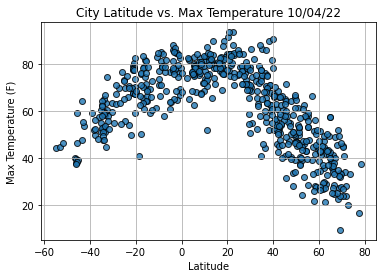

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

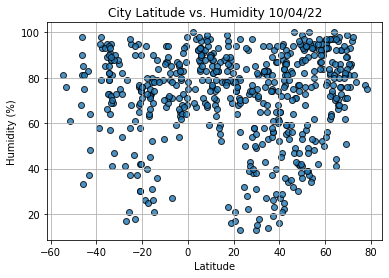

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

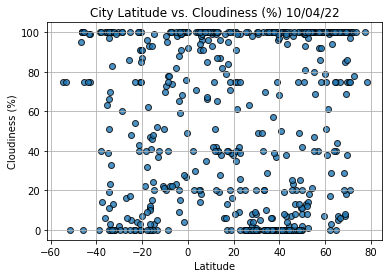

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()